In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.reuters.load_data(num_words=10000)

In [4]:
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.reuters.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
inverted_word_index = dict((i, word) for (word, i) in word_index.items())
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])

decoded_sequence

'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train_processed = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_processed = to_categorical(train_labels, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train_processed, y_train_processed, test_size=0.20, random_state=42)

In [10]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/25
15/15 [==============================] - 1s 30ms/step - loss: 3.2585 - accuracy: 0.3403 - val_loss: 1.9294 - val_accuracy: 0.5999
Epoch 2/25
15/15 [==============================] - 0s 12ms/step - loss: 1.7818 - accuracy: 0.6264 - val_loss: 1.4694 - val_accuracy: 0.6861
Epoch 3/25
15/15 [==============================] - 0s 11ms/step - loss: 1.3906 - accuracy: 0.6942 - val_loss: 1.2865 - val_accuracy: 0.7179
Epoch 4/25
15/15 [==============================] - 0s 12ms/step - loss: 1.1222 - accuracy: 0.7418 - val_loss: 1.1853 - val_accuracy: 0.7368
Epoch 5/25
15/15 [==============================] - 0s 11ms/step - loss: 1.0000 - accuracy: 0.7730 - val_loss: 1.1229 - val_accuracy: 0.7468
Epoch 6/25
15/15 [==============================] - 0s 12ms/step - loss: 0.8892 - accuracy: 0.7921 - val_loss: 1.0653 - val_accuracy: 0.7735
Epoch 7/25
15/15 [==============================] - 0s 12ms/step - loss: 0.7810 - accuracy: 0.8236 - val_loss: 1.0332 - val_accuracy: 0.7785
Epoch 8/25
15

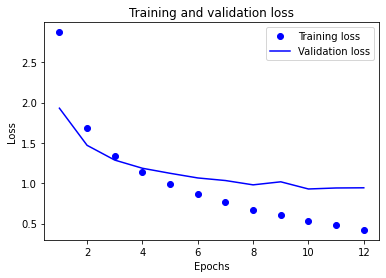

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 1ms/step - loss: 0.9948 - accuracy: 0.7872


[0.9947595596313477, 0.7871772050857544]